<a href="https://colab.research.google.com/github/loramti/TSIR/blob/main/Interestratemodelling_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import  scipy.stats as st
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import math
from functools import reduce
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
data1=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 3-Month Bond Yield Historical Data.csv')
data2=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 6-Month Bond Yield Historical Data.csv')
data3=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 1-Year Bond Yield Historical Data.csv')
data4=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 2-Year Bond Yield Historical Data.csv')
data5=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 10-Year Bond Yield Historical Data.csv')
data6=pd.read_csv('/home/lova/Desktop/EssayProject/code interest rate model/KENYABONDYIELD/Kenya 25-Year Bond Yield Historical Data.csv')

In [ ]:
def datawithmask(df,start_date,end_date,column):
    mask = (df[column] >= start_date) & (df[str(column)] <= end_date)
    df=df.loc[mask]
    return df

In [ ]:
Data_yield=[data1,data2,data3,data4,data5,data6]
# Data_yield

In [ ]:
for d in Data_yield:
    d["Date"] = pd.to_datetime(d["Date"])
    d.sort_values(by="Date",inplace=True)
    d["year"] = pd.DatetimeIndex(d["Date"]).year
    d['month'] = pd.DatetimeIndex(d['Date']).month

In [ ]:
for i in range(len(Data_yield)):
    Data_yield[i]=datawithmask(Data_yield[i],2015,2021,'year')[['month','year','Price']].reset_index(drop=True)
    Data_yield[i].index=Data_yield[i].index+1

In [ ]:
Data_yield[0]

,month,year,Price
1,1,2015,8.529
2,1,2015,0.000
3,1,2015,8.601
4,1,2015,8.572
5,2,2015,8.572
...,...,...,...
344,11,2021,7.114
345,12,2021,8.628
346,12,2021,7.280
347,12,2021,7.265


In [ ]:
for i in range(len(Data_yield)):
    Data_yield[i]['Week_month']=0
    Data_yield[i]['Week_month'][1]=1
    for k in Data_yield[i].index:
        if k!=1  and Data_yield[i]['month'][k]==Data_yield[i]['month'][k-1]: 
            Data_yield[i]['Week_month'][k]=Data_yield[i]['Week_month'][k-1]+1
        else :
            Data_yield[i]['Week_month'][k]=1

<ipython-input-8-48d9c36c3934>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_yield[i]['Week_month'][1]=1
<ipython-input-8-48d9c36c3934>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_yield[i]['Week_month'][k]=1
<ipython-input-8-48d9c36c3934>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_yield[i]['Week_month'][k]=Data_yield[i]['Week_month'][k-1]+1


In [ ]:
for i in range(len(Data_yield)):
    print(Data_yield[i][Data_yield[i]['Price']==0])

   month  year  Price  Week_month
2      1  2015    0.0           2
Empty DataFrame
Columns: [month, year, Price, Week_month]
Index: []
Empty DataFrame
Columns: [month, year, Price, Week_month]
Index: []
Empty DataFrame
Columns: [month, year, Price, Week_month]
Index: []
Empty DataFrame
Columns: [month, year, Price, Week_month]
Index: []
Empty DataFrame
Columns: [month, year, Price, Week_month]
Index: []


In [ ]:
# data_frames = [df1, df2, df3]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['year','month','Week_month']), Data_yield)
df_merged.columns=['Month','Year','3Month','Week_number','6Month','1Year','2Year','10Year','25Year']

In [ ]:
DYB=df_merged[['3Month','6Month','1Year','2Year','10Year','25Year']]
# DYB=np.array(DYB)
DYB

,3Month,6Month,1Year,2Year,10Year,25Year
0,8.529,10.200,10.679,10.786,12.125,13.000
1,0.000,10.200,10.679,10.761,12.325,13.000
2,8.601,10.237,10.707,11.033,12.750,13.200
3,8.572,10.334,10.984,11.033,12.750,13.200
4,8.572,10.334,10.984,11.033,12.750,13.200
...,...,...,...,...,...,...
343,7.114,7.747,8.840,9.290,12.640,13.773
344,8.628,10.525,10.895,9.376,12.650,13.605
345,7.280,7.984,9.091,9.432,12.700,13.739
346,7.265,7.977,9.164,9.900,12.650,13.663


In [ ]:
DYB.shape

(348, 6)

In [ ]:
a=[1,2,3]
b=[5,4,6]
a,b=np.meshgrid(a,b)
a.size

9

In [ ]:
# t=np.array(range(DYB.shape[0]))
t=np.array(range(DYB.shape[0]))
T=np.array(range(DYB.shape[1]))
t, T = np.meshgrid(t,T)

In [ ]:
Tf=np.array([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# tf=np.array(range(dforecasted_c.shape[0]))
tf=np.arange(len(DYB))
# Tf=np.array(range(dforecasted_v.shape[1]))
tf, Tf = np.meshgrid(tf,Tf)

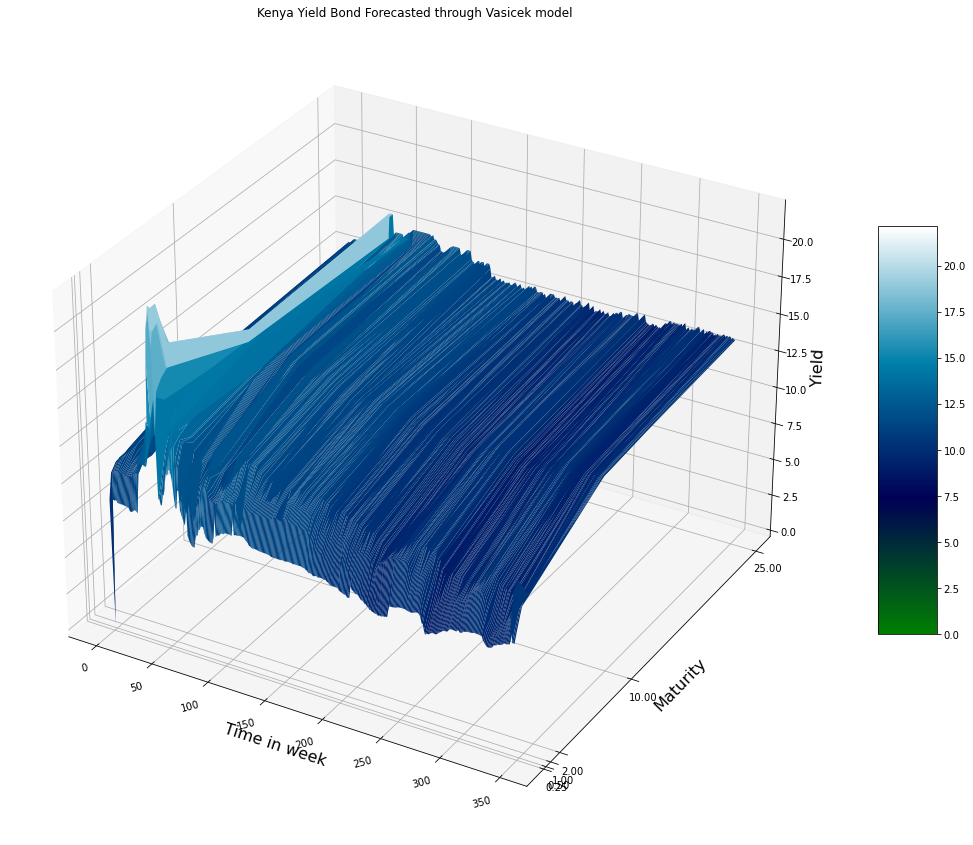

In [ ]:
# !pip3 install tikzplotlib
import tikzplotlib
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(tf, Tf, DYB.T, rstride=10, cstride=1, vmin=np.nanmin(DYB), vmax=np.nanmax(DYB), cmap='ocean')
# ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021')
ax.set_ylabel('Maturity in year',fontsize=16)
ax.set_zlabel('Yield in %',fontsize=16)
ax.set_xlabel('Time in week',fontsize=16)
# ax.set_yticks([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# SO question
# def format_date(x, pos=None):
#      return dates.num2date(x).strftime('%Y-%m-%d')

# ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.yaxis.set_tick_params(labelsize=10)
fig.colorbar(surf, shrink=0.5, aspect=7)
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(15)
plt.title('Kenya Yield Bond Forecasted through Vasicek model')
plt.savefig("KenyafrcstYC2.png")
plt.show()

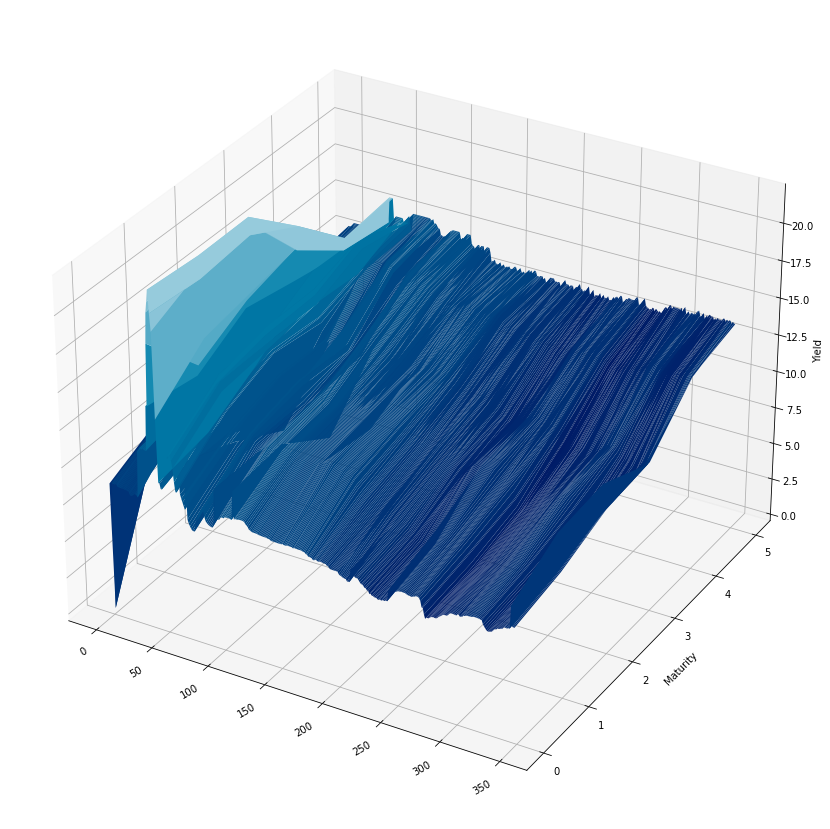

In [ ]:
# from matplotlib import cm
import tikzplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(t, T, DYB.T, rstride=10, cstride=1, vmin=np.nanmin(DYB), vmax=np.nanmax(DYB), cmap='ocean')
# ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')

# SO question
# def format_date(x, pos=None):
#      return dates.num2date(x).strftime('%Y-%m-%d')

# ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(30)
plt.savefig("KenyaYC.png")
plt.show()

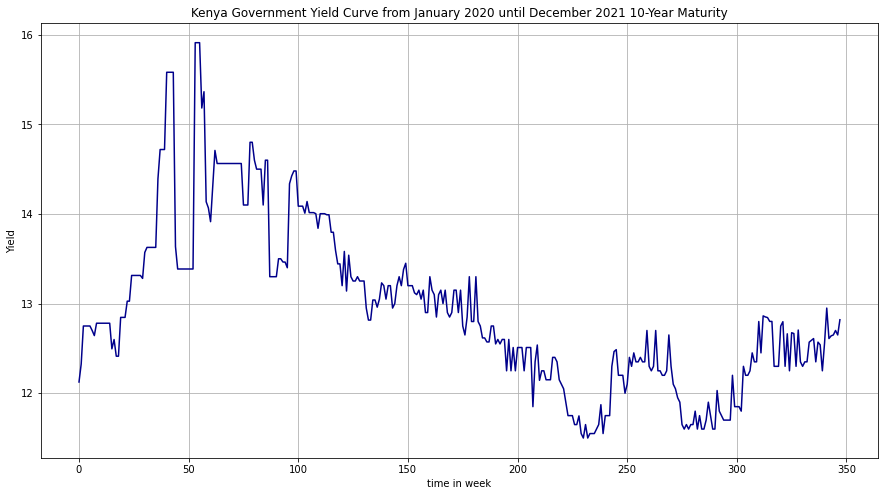

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
X=np.array(range(DYB.shape[0]))
# Y=np.array(range(DYB.shape[1]))
r2=df_merged['10Year']
ax.plot(X, r2,'darkblue',)
ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021 10-Year Maturity')
ax.set_xlabel('time in week')
ax.set_ylabel('Yield')
plt.grid()
plt.savefig("KenyaYC10.png")
plt.show();

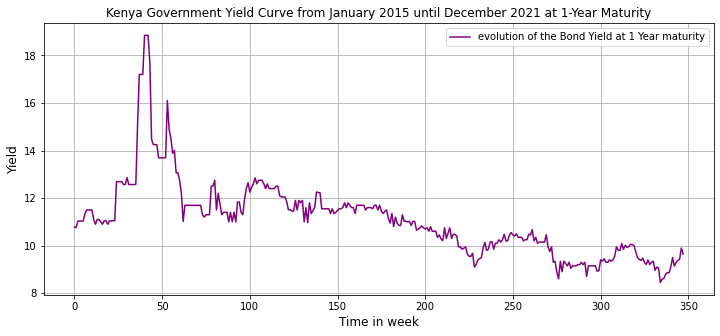

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
X=np.array(range(DYB.shape[0]))
# Y=np.array(range(DYB.shape[1]))
Y=df_merged['2Year']
ax.plot(X, Y,'purple', label='evolution of the Bond Yield at 1 Year maturity')
ax.set_title('Kenya Government Yield Curve from January 2015 until December 2021 at 1-Year Maturity')
ax.set_xlabel('Time in week',fontsize=12)
ax.set_ylabel('Yield',fontsize=12)
plt.legend();
plt.grid();
plt.savefig("KenyaYC2year.png")
plt.show()

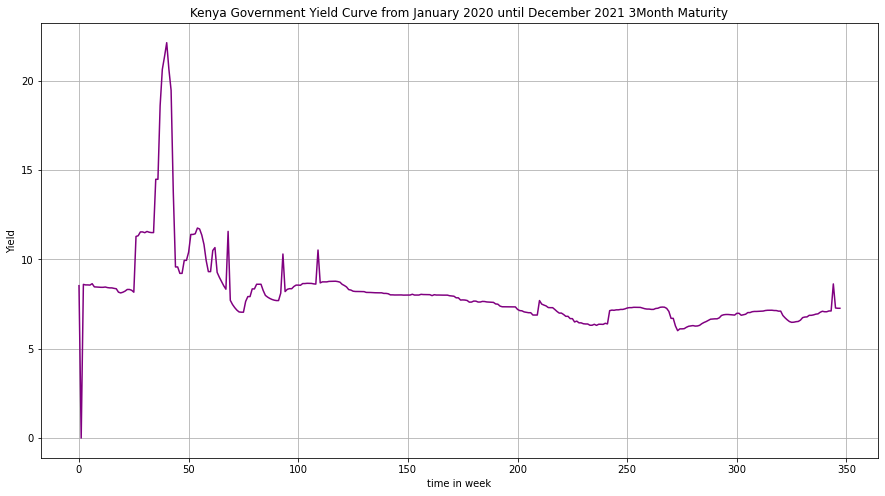

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
X=np.array(range(DYB.shape[0]))
# Y=np.array(range(DYB.shape[1]))
r1=df_merged['3Month']
ax.plot(X, r1,'purple')
ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021 3Month Maturity')
ax.set_xlabel('time in week')
ax.set_ylabel('Yield')
plt.grid()
plt.savefig("KenyaYC3M.png")
plt.show()

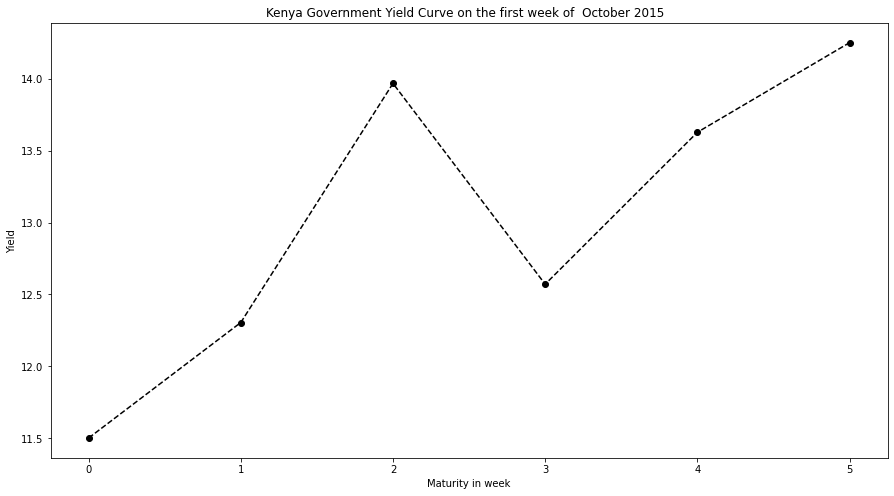

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
# X=np.array(range(DYB.shape[0]))
X=np.array(range(DYB.shape[1]))
Y=DYB.iloc[34]
ax.plot(X, Y,'ok--')
ax.set_title('Kenya Government Yield Curve on the first week of  October 2015  ')
ax.set_xlabel('Maturity in week')
ax.set_ylabel('Yield')
# plt.savefig("KenyaYC10.png")
plt.show()

NelsonSiegelCurve(beta0=14.243101113908622, beta1=8.679034728147542, beta2=-8.197198710579922, tau=2.4618503361824335)


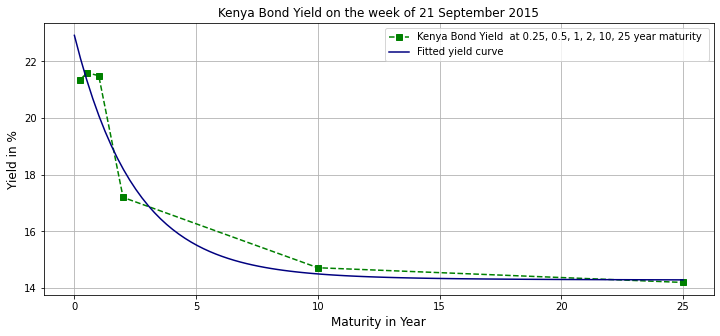

In [ ]:
Y39=np.array(DYB.iloc[39])
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols


t = np.array([0.25, 0.5, 1.0, 2.0,10.0,25.0])
Y39
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.plot(t,Y39,'sg--',label='Kenya Bond Yield  at 0.25, 0.5, 1, 2, 10, 25 year maturity ')
curve_fit, status = calibrate_ns_ols(t,Y39) #NS model calibrate
# y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04])
assert status.success
print(curve_fit)
t = np.linspace(0, 25, 100)
ax.plot(t, curve_fit(t),'navy',label='Fitted yield curve')
ax.set_xlabel('Maturity in Year', fontsize=12)
ax.set_ylabel('Yield in %', fontsize=12)
plt.title('Kenya Bond Yield on the week of 21 September 2015')
plt.grid();
plt.legend();
plt.savefig('invertedslope.png');
plt.show();

NelsonSiegelCurve(beta0=13.788921922485097, beta1=-5.111969047743116, beta2=2.647741416617717, tau=0.22178247330502737)


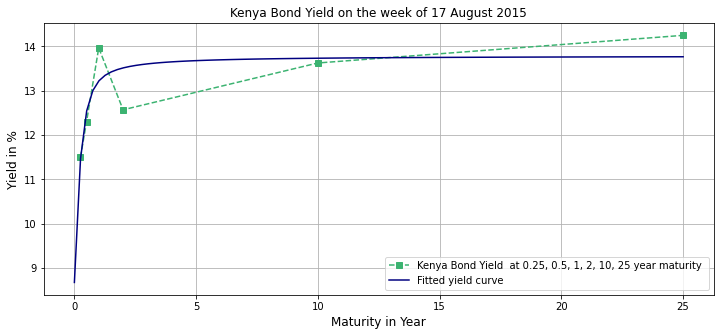

In [ ]:
Y37=np.array(DYB.iloc[34])
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols


t = np.array([0.25, 0.5, 1.0, 2.0,10.0,25.0])
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111)
ax.plot(t,Y37,'s--',color='mediumseagreen',label='Kenya Bond Yield  at 0.25, 0.5, 1, 2, 10, 25 year maturity ')
curve_fit, status = calibrate_ns_ols(t,Y37) #NS model calibrate
# y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04])
assert status.success
print(curve_fit)
t = np.linspace(0, 25, 100)
# tt=np.array([0.25, 0.5, 1, 2,5,10.0,25.0])
ax.plot(t, curve_fit(t),'navy',label='Fitted yield curve')
ax.set_xlabel('Maturity in Year', fontsize=12)
ax.set_ylabel('Yield in %', fontsize=12)
# ax.set_xticks([0.25, 0.5, 1, 2,5,10.0,25.0])
plt.title('Kenya Bond Yield on the week of 17 August 2015')
plt.grid();
plt.legend();
plt.savefig('normalslope.png');
plt.show();

In [ ]:
####Partitioning the whole sample into m sub-group normal distribution
column=data2.columns
#print(column)
def partition_data_normal(pri):
    h=4
    kstat,pvals=lilliefors(pri[0:h])
    # print(pvals)
    # column
    n=list()
    while(pvals > 0.05):
        h=h+1
        priceb=pri[0:h].reset_index(drop=True)
        pvals=lilliefors(pri[0:h])[1]
    n.append(h)
    i=0
    while n[i]<len(pri):
        h=n[i]+4
        pvals=lilliefors(pri[n[i]:h])[1]
        while(pvals > 0.05 and h<len(pri)):
            h=h+1
            # if (h==len(pri)):
            #     n.append(h)
            #     break
            # else:
            pvals=lilliefors(pri[n[i]:h])[1]
        n.append(h)
        if len(pri)-n[i+1]<4:
            resti=pri[n[i+1]:]
            break
        else :i=i+1
    return n,resti
n1,resti1=partition_data_normal(r1)
n2,resti2=partition_data_normal(r2)
print(resti1,resti2)
print(n2)
print(len(n1),len(n2))

345    7.280
346    7.265
347    7.264
Name: 3Month, dtype: float64 Series([], Name: 10Year, dtype: float64)
[5, 12, 16, 30, 34, 48, 52, 56, 69, 73, 78, 87, 91, 97, 104, 108, 112, 116, 130, 146, 153, 165, 173, 189, 194, 202, 206, 235, 244, 249, 258, 263, 267, 281, 286, 299, 303, 316, 320, 327, 331, 338, 348]
33 43


In [ ]:
DY=df_merged[['3Month','6Month','1Year','2Year','10Year','25Year']]
DY3M,DY6M,DY1Y,DY2Y,DY10Y,DY25Y=[DY[i] for i in ['3Month','6Month','1Year','2Year','10Year','25Year']]

In [ ]:
########## Paritionining with CIR using Kolmogorov Test:
from scipy.stats import kstest
from scipy import stats


### CALIBRATING function

In [ ]:
def calibration_CIR(r):         #r is a vector 
    n=len(r)
    s0,s1,s2,s3,s4,s5,s6,s7=np.zeros(8)
    for i in range(1,n):
        s1=s1+r[i]/r[i-1]
        i=i+1
    for i in range(1,n):
        s2=s2+r[i]
        i=i+1
    for i in range(1,n):
        s0=s0+r[i-1]
        i=i+1
    for i in range(1,n):
        s3=s3+(r[i-1])**(-1)
        i=i+1
    s4=s2*s3
    s7=s0*s3
    alpha=-np.log(((n-1)*s1-s4)/((n-1)**2-s7))
    mu=(1/(n-1))*s2+((np.exp(-alpha))/((n-1)*(1-np.exp(-alpha))))*(r[n-1]-r[0])
    for i in range(1,n):
        s5=s5+((r[i-1])**(-1))*(r[i]-r[i-1]*np.exp(-alpha)-mu*(1-np.exp(-alpha)))**2
        i=i+1
    for i in range(1,n):
        s6=s6+((r[i-1])**(-1))*(((mu/2-r[i-1])*np.exp(-2*alpha)-(mu-r[i-1])*np.exp(-alpha)+(mu/2*alpha)))/alpha
        i=i+1
    sigma=s5/s6
    return alpha,mu,sigma,r[0]

In [ ]:
def calibration_vasicek(r):
    n=len(r)
    f=1/(n-1)
    s1,s2,s3,s4,s5=np.zeros(5)
    # for i in range(1,n):
    #     s1=s1+r[i]
    #     i=i+1
    s1=np.sum(r[1:])
    # for i in range(1,n):
    #     s2=s2+r[i-1]
    #     i=i+1
    s2=np.sum(r[0:-1])
    for i in range(1,n):
        s3=s3+(r[i-1])*r[i]
        i=i+1
#     s3=np.sum(r[1:]*r[:-1])
    # for i in range(1,n):
    #     s4=s4+r[i-1]**2
    #     i=i+1
    s4=np.sum(np.power(r[:-1],2))
    sexp=np.abs((f*s2*s1-s3)/(f*s2**2-s4))
    # alpha=-math.log(abs((f*s2*s1-s3)/(f*s2**2-s4)))
    alpha=-np.log(sexp)
    f2=1/(1-sexp)
    mu=f2*(f*s1-(sexp*f*s2))
    for i in range(1,n):
        s5=s5+((r[i]-r[i-1]*np.exp(-alpha))-mu*(1-np.exp(-alpha)))**2
        i=i+1
    sigma=((2*alpha)/(1-sexp))*(1/(n-1))*s5
    return alpha,mu,sigma,r[0]

### Partitioning 

In [ ]:
def partitioning_data_ncx2(r):
    h=4
    alpha,mu,sigma,r0=calibration_CIR(r[:h])
    df=h-1
    nc=r0*np.exp(-alpha*h)
    pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
    n=list()
    while(pvals > 0.05):
        h=h+1
        c=(2*alpha)/((1-np.exp(-alpha*h))*sigma**2)
        alpha,mu,sigma,r0=calibration_CIR(r[:h])
        df=h-1
        nc=r0*np.exp(-alpha*h)
        pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
    n.append(h)
    i=0
    while n[i]<len(r):
        h=n[i]+4
        pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
        while(pvals > 0.05 and h<len(pri)):
            h=h+1
            c=(2*alpha)/((1-np.exp(-alpha*h))*sigma**2)
            alpha,mu,sigma,r0=calibration_CIR(r[:h])
            df=h-1
            nc=r0*np.exp(-alpha*h)
            pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
        n.append(h)
        if len(r)-n[i+1]<4:
            resti=r[n[i+1]:]
            break
        else :i=i+1
    return n,resti
n_x,restix=partitioning_data_ncx2(r1)
n_x2,restix2=partitioning_data_ncx2(r2)
print(restix,restix2)
print(n_x,n_x2)
print(len(n_x),len(n_x2))

Series([], Name: 3Month, dtype: float64) Series([], Name: 10Year, dtype: float64)
[4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348] [4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196, 200, 204, 208, 212, 216, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 268, 272, 276, 280, 284, 288, 292, 296, 300, 304, 308, 312, 316, 320, 324, 328, 332, 336, 340, 344, 348]
87 87


In [ ]:
r1=r1.tolist()
r2=r2.tolist()
# n=len(r)
alphav1,muv1,sigmav1,r0v1=calibration_vasicek(r1)
alphav2,muv2,sigmav2,r0v2=calibration_vasicek(r2)
alphac1,muc1,sigmac1,r0c1=calibration_vasicek(r1)
alphac2,muc2,sigmac2,r0c2=calibration_vasicek(r2)
# sigma=np.sqrt(sigma2)
# print(alpha,mu,sigma,r0)

In [ ]:
# calibrating
def paramcalvas(r1,n1):
    alpha_v=list()
    mu_v=list()
    sigma2_v=list()
    sigma_v=list()
    r0v=list()
    alpha_v.append(calibration_vasicek(r1[0:n1[0]])[0])
    mu_v.append(calibration_vasicek(r1[0:n1[0]])[1])
    sigma2_v.append(calibration_vasicek(r1[0:n1[0]])[2])
    r0v.append(calibration_vasicek(r1[0:n1[0]])[3])
    # alpha_c[0],mu_c[0],sigma2_c[0]=calibration_CIR(r[0:n[0]])[0]
    for i in range(0,len(n1)-1):
        pb=r1[n1[i]:n1[i+1]]
        # alpha_v[i+1],mu_v[i+1],sigma2_v[i+1]=calibration_vasicek(pb)
        alpha_v.append(calibration_vasicek(pb)[0])
        mu_v.append(calibration_vasicek(pb)[1])
        sigma2_v.append(calibration_vasicek(pb)[2])
        r0v.append(calibration_vasicek(pb)[3])
    parametersv=pd.DataFrame({'alpha':alpha_v,'mu':mu_v,'sigma':sigma2_v,'r0':r0v})
    return parametersv
# alpha_v.append(calibration_vasicek(price[0:n[0]])[0])
# mu_v.append(calibration_vasicek(price[0:n[0]])[1])
# sigma2_v.append(calibration_vasicek(price[0:n[0]])[2])
# sigma_v=np.sqrt(sigma2_v)
# print(alpha_v,mu_v,sigma_v)

In [ ]:
p1=paramcalvas(r1,n1)
p2=paramcalvas(r2,n2)

In [ ]:
# calibrating
def paramcalcir(r,n):
    alpha_c=list()
    mu_c=list()
    sigma2_c=list()
    sigma_c=list()
    r0=list()
    alpha_c.append(calibration_CIR(r[0:n[0]])[0])
    mu_c.append(calibration_CIR(r[0:n[0]])[1])
    sigma2_c.append(calibration_CIR(r[0:n[0]])[2])
    r0.append(calibration_CIR(r[0:n[0]])[3])
    # alpha_c[0],mu_c[0],sigma2_c[0]=calibration_CIR(r[0:n[0]])[0]
    for i in range(0,len(n)-1):
        pb=r[n[i]:n[i+1]]
        # alpha_v[i+1],mu_v[i+1],sigma2_v[i+1]=calibration_vasicek(pb)
        alpha_c.append(calibration_CIR(pb)[0])
        mu_c.append(calibration_CIR(pb)[1])
        sigma2_c.append(calibration_CIR(pb)[2])
        r0.append(calibration_CIR(pb)[3])
    parameters=pd.DataFrame({'alpha':alpha_c,'mu':mu_c,'sigma':sigma2_c,'r0':r0})
    return parameters

In [ ]:
r1[1]=np.mean(r1)
r1[1]

8.07196264367816

In [ ]:
pc1=paramcalcir(r1,n_x)
pc2=paramcalcir(r2,n_x2)

#### test for nan value in the parameters

In [ ]:
def testparam(parameters,r):
    n2index=list(parameters[np.isinf(parameters).any(1)].index)
    nindex=list(parameters[parameters.isna().any(axis=1)].index)
    [n2index.remove(i) for i in n2index if i in nindex]
    lst=nindex+n2index
    parameter=[list(calibration_vasicek(r))]
    col=['alpha','mu','sigma','r0']
    parameter=pd.DataFrame(parameter,columns=col)
    for i in lst:
        parameters.iloc[i].alpha=parameter.alpha[0]
        parameters.iloc[i].mu=parameter.mu[0]
        parameters.iloc[i].sigma=parameter.sigma[0]
    return parameters

In [ ]:
##### Expected Interest Rates CIR
def ExpectedRate(self, T):
    tau = 1
    result = self.r0 * np.exp(-self.alpha*tau) + self.mu*(1-np.exp(-self.alpha*tau)) 
    return result


In [ ]:
T1=len(r1)#### time horizon
T2=len(r2)#### time horizon
parameter1=[list(calibration_vasicek(r1))]
parameter2=[list(calibration_vasicek(r2))]
col=['alpha','mu','sigma','r0']
parameter1=pd.DataFrame(parameter1,columns=col)
parameter2=pd.DataFrame(parameter2,columns=col)
e_rv2=[ExpectedRate(parameter2,i) for i in range(T2)]
e_rv1=[ExpectedRate(parameter1,i) for i in range(T1)]

In [ ]:
 #### list of subsample
def lssub(r,n):
    sub=list()
    lenn=len(n)
    s1=r[0:n[0]]
    sub.append(s1)
    for i in range(lenn-1):
        if i==lenn-1 and len(r)==n[len(n)-1]:
            sub.append(r[n[i]:])
        else:
            sub.append(r[n[i]:n[i+1]]) 
    return sub

In [ ]:
def expected_rate(sub,m,parameters):######## expected rate for one subsample
    #m= index of the subsample r
    r=sub[m]
    T=len(r)
    parameter=pd.DataFrame(parameters.iloc[m]).T
    e_r=[ExpectedRate(parameter,i) for i in range(T)]
    return e_r

In [ ]:
p1=testparam(p1,r1)
p2=testparam(p2,r2)

In [ ]:
pc1=testparam(pc1,r1)
pc2=testparam(pc2,r2)

In [ ]:
sub1=lssub(r1,n1)
sub2=lssub(r2,n2)
subc1=lssub(r1,n_x)
subc2=lssub(r2,n_x2)

In [ ]:
def exp_r(sub,p):
    exp_cir=list()
    for i in range(len(sub)):
        exp_cir=exp_cir+expected_rate(sub,i,p)
    return exp_cir

In [ ]:
exprv1=exp_r(sub1,p1)
exprv2=exp_r(sub2,p2)
exprc1=exp_r(subc1,pc1)
exprc2=exp_r(subc2,pc2)

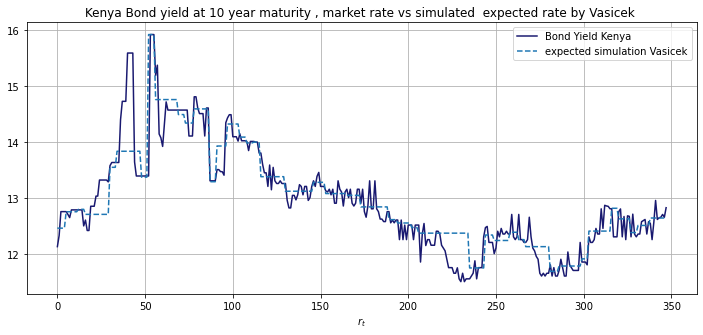

In [ ]:
### plot expected estimation vasicek
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(r2,'midnightblue', label='Bond Yield Kenya')
###simulated path with estimate parameter##
ax.plot(exprv2[:],'--',label='expected simulation Vasicek')
# ax.plot(t,np.mean(r_c,axis=0),'g--',label='mean path')
ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$r_t$')
ax.legend();
plt.grid();
plt.title('Kenya Bond yield at 10 year maturity , market rate vs simulated  expected rate by Vasicek ')
plt.savefig('D1V.png')

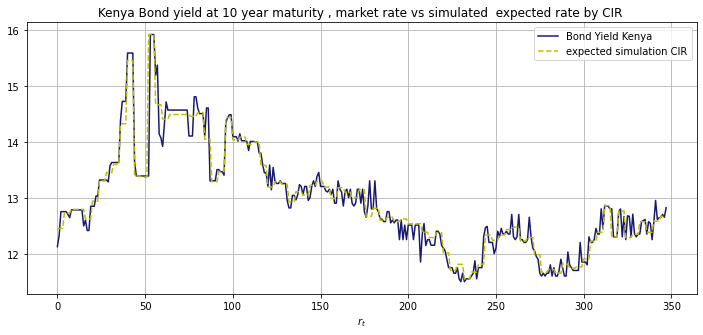

In [ ]:
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(r2,'midnightblue', label='Bond Yield Kenya')
###simulated path with estimate parameter##
ax.plot(exprc2[:],'y--',label='expected simulation CIR')
# ax.plot(t,np.mean(r_c,axis=0),'g--',label='mean path')
ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$r_t$')
ax.legend();
plt.grid();
plt.title('Kenya Bond yield at 10 year maturity , market rate vs simulated  expected rate by CIR ')
plt.savefig('D1C.png')

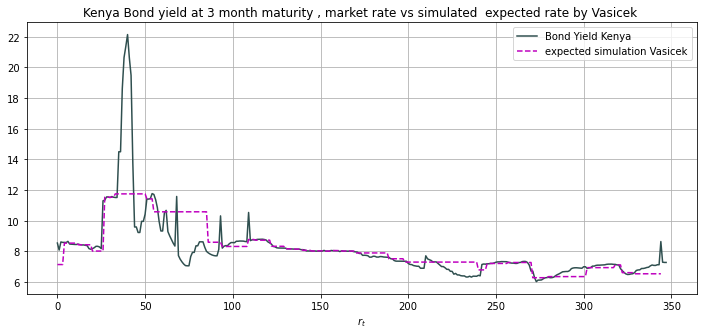

In [ ]:
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(r1,'darkslategray', label='Bond Yield Kenya')
###simulated path with estimate parameter##
ax.plot(exprv1[:],'m--',label='expected simulation Vasicek')
# ax.plot(t,np.mean(r_c,axis=0),'g--',label='mean path')
ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$r_t$')
ax.legend();
plt.title('Kenya Bond yield at 3 month maturity , market rate vs simulated  expected rate by Vasicek ')
plt.grid();
plt.savefig('D3V.png')
plt.show();


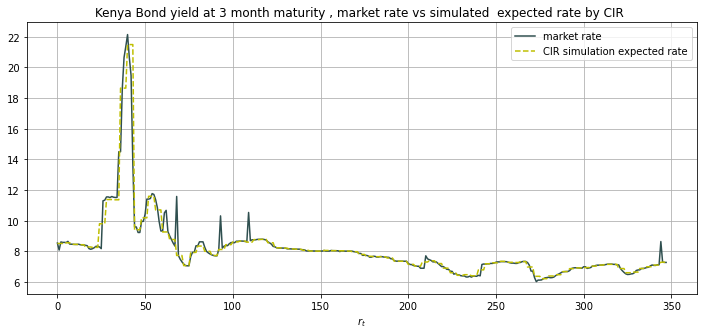

In [ ]:
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(r1,'darkslategray', label='market rate ')
###simulated path with estimate parameter##
ax.plot(exprc1[:],'y--',label='CIR simulation expected rate')
# ax.plot(t,np.mean(r_c,axis=0),'g--',label='mean path')
ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$r_t$')
plt.grid()
ax.legend();
plt.title('Kenya Bond yield at 3 month maturity , market rate vs simulated  expected rate by CIR ')
plt.savefig('D3C.png')
plt.show();


In [ ]:
def subexpl(n,exp):
    subexp=list()
    lenn=len(n)
    s1=exp[0:n[0]]
    subexp.append(s1)
    for i in range(lenn-1):
        if i==lenn-1:
            subexp.append(exp[n[i]:])
        else:
            subexp.append(exp[n[i]:n[i+1]])
    return subexp

#### subsample of the expected value

In [ ]:
subexpv1=subexpl(n1,exprv1)
subexpv2=subexpl(n2,exprv2)
subexpc1=subexpl(n_x,exprc1)
subexpc2=subexpl(n_x2,exprc2)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn import preprocessing
# rh_normalized=preprocessing.normalize(rh)
# rh_normalized
def nmrse(a,b): ### takes two arguments, the real one, and the forecasted or estimated one
    rmse=np.sqrt(mse(a,b))
    rmax=max(a)
    rmin=min(a)
    rrmse=rmse/(rmax-rmin)### relative RMSE
    return rrmse

In [ ]:
len(sub1),len(subexpv1)

(33, 33)

In [ ]:
def errorsbb(sub,subexp):
    error=list()
    for i in range(len(sub)):
        b=subexp[i]
        a=sub[i]
        rmse=np.sqrt(mse(a,b))
        error.append(rmse)
    return error

In [ ]:
erv1=errorsbb(sub1,subexpv1)
erv2=errorsbb(sub2,subexpv2)
erc1=errorsbb(subc1,subexpc1)
erc2=errorsbb(subc2,subexpc2)

In [ ]:
len(exprc1),len(r1),len(subc1)

(348, 348, 87)

In [ ]:
def stringnamesub1(sub,r):
    lnamesub=list()### name of r index of each subsample
    a='r{}...r{}'.format(0,len(sub[0])-1)
    lnamesub.append(a)
    n=0
    for i in range (len(sub)):
        a='r{}...r{}'.format(r[len(sub[i-1])],r[len(sub[i])-1])
        n=n+len(sub[i])
        lnamesub.append(a)
    return lnamesub

In [ ]:
def stringnamesub(n,r):
    lnamesub=list()### name of r index of each subsample
    a='r{}...r{}'.format(0,n[0]-1)
    lnamesub.append(a)
    for i in range (1,len(n)):
        if i==len(n)-1 & n[i]==len(r)-1:
            break
            a='r{}...r{}'.format(n[i],len(r)-1)
        else:
            a='r{}...r{}'.format(n[i-1],n[i]-1)
        lnamesub.append(a)
    return lnamesub

In [ ]:
lnamesubv1=stringnamesub(n1,r1)
lnamesubv2=stringnamesub(n2,r2)
lnamesubc1=stringnamesub(n_x,r1)
lnamesubc2=stringnamesub(n_x2,r2)

In [ ]:
len(lnamesubv1),len(erv1)

(33, 33)

###  TAble of erro analysis for each subsample

In [ ]:
def erroranalysis(lnamesub,error):
    dicterror={'Sub':lnamesub,'e':error}
    tableerror=pd.DataFrame(dicterror)
    tableerror=pd.DataFrame(dicterror).set_index('Sub')
    return tableerror

In [ ]:
tablerror1=erroranalysis(lnamesubv1,erv1)
tablerror2=erroranalysis(lnamesubv2,erv2)
tablerror3=erroranalysis(lnamesubc1,erc1)
tablerror4=erroranalysis(lnamesubc2,erc2)

In [ ]:
l1=np.arange(7,len(tablerror1),7)
l2=np.arange(7,len(tablerror2),7)
l3=np.arange(7,len(tablerror3),7)
l4=np.arange(7,len(tablerror4),7)

In [ ]:
# tableerror.T.to_excel('tableerror.xlsx')

In [ ]:
# print(tableerror[:7].T.to_latex())
# for i in range(1,len(l)):
#     print(tableerror[l[i-1]:l[i]].T.to_latex())
#     if i== len(l)-1:
#         print(tableerror[l[i]:].T.to_latex())

In [ ]:
l2

array([ 7, 14, 21, 28, 35, 42])

In [ ]:
### error analysis for the data 1 which is partitioned into m subsample following a normal distribution
# print(tablerror1[:7].T.to_latex())
# for i in range(1,len(l1)):
#     print(tablerror1[l1[i-1]:l1[i]].T.to_latex())
#     if i== len(l1)-1:
#         print(tablerror1[l1[i]:].T.to_latex())

In [ ]:
## error analysis for the data 1 which is partitioned into m subsample following a ncx2 distribution
# print(tablerror3[:7].T.to_latex())
# for i in range(1,len(l3)):
#     print(tablerror3[l3[i-1]:l3[i]].T.to_latex())
#     if i== len(l3)-1:
#         print(tablerror3[l3[i]:].T.to_latex())

In [ ]:
# ## error analysis for the data 2 which is partitioned into m subsample following a normal distribution
# print(tablerror2[:7].T.to_latex())
# for i in range(1,len(l2)):
#     print(tablerror2[l2[i-1]:l2[i]].T.to_latex())
#     if i== len(l2)-1:
#         print(tablerror2[l2[i]:].T.to_latex())

In [ ]:
# print(tablerror4[:7].T.to_latex())
# for i in range(1,len(l4)):
#     print(tablerror4[l4[i-1]:l4[i]].T.to_latex())
#     if i== len(l4)-1:
#         print(tablerror4[l4[i]:].T.to_latex())

In [ ]:
def historical_data(r,m,h):
    return r[m-h:m]
def test_kolmog_ncx2(m,r):
    h=4
    alpha,mu,sigma,r0=calibration_CIR(r[:h])
    df=h-1
    nc=r0*np.exp(-alpha*h)
    pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
    while(pvals > 0.05):
        h=h+1
        c=(2*alpha)/((1-np.exp(-alpha*h))*sigma**2)
        alpha,mu,sigma,r0=calibration_CIR(r[:h])
        df=h-1
        nc=r0*np.exp(-alpha*h)
        pvals=kstest(r[:h],'ncx2',args=[df,nc])[1]
    return r[m-h:m]

In [ ]:
# Calibration of first sample path via Maximum Likelihood Estimation
def ou_calibration_ml(X):

    n = len(X)-1    
    Sx = np.sum(X[:-1])
    Sy = np.sum(X[1:])
    Sxx = np.sum(np.power(X[:-1], 2))
    Syy = np.sum(np.power(X[1:], 2))
    Sxy = np.sum(np.multiply(X[:-1], X[1:]))
    
    theta = (Sy*Sxx - Sx*Sxy) / (n*(Sxx - Sxy) - Sx**2 + Sx*Sy)
    a = np.abs((Sxy - theta*Sx - theta*Sy + n*theta**2)/(Sxx - 2*theta*Sx + n*theta**2))
    sigmah2 = (Syy - 2*a*Sxy + a**2*Sxx - 2*theta*(1-a)*(Sy - a*Sx) + n*theta**2*(1-a)**2)/n
    kappa = -np.log(a)
    sigma = np.sqrt(sigmah2*2*kappa/(1-a**2))
    
    return theta, sigma, kappa

In [ ]:
def historical_data(r,m,h):
    return r[m-h:m]
def test_liliefors_hist(r,m):
    h=4
    ### find the smaller interest rate value such that the sub(r[m-h:m]) is 
    pvals=lilliefors(historical_data(r,m,h))[1]
    while pvals>0.05:
        h=h+1
        pvals=lilliefors(historical_data(r,m,h))[1]
    return r[m-h:m]

In [ ]:
def forecasted_v(r):
    m=52
    f_r=list()
    lscal=list()
    while m<len(r):
        chpt=list(test_liliefors_hist(r,m))
        theta_ML, sigma_ML, kappa_ML = ou_calibration_ml(chpt)
        r0=chpt[0]
        cal=[kappa_ML,theta_ML, sigma_ML,r0]
    #     lscal.append(cal)
    #     m=m+1
        col=['alpha','mu','sigma','r0']
        params=pd.DataFrame([cal],columns=col)
        f_r.append(ExpectedRate(params,len(chpt)))
        m=m+1
    return f_r

In [ ]:
r3=DY3M

In [ ]:
frv=forecasted_v(r3)

In [ ]:
def forecasted_c(r3):
    m=52
    f_r3=list()
    # lscal=list()
    while m<len(r3):
        chpt=test_kolmog_ncx2(m,r3)
        chpt=list(chpt)
        theta_ML, sigma_ML, kappa_ML = ou_calibration_ml(chpt)
        r0=chpt[0]
        cal=[kappa_ML,theta_ML, sigma_ML,r0]
    #     lscal.append(cal)
    #     m=m+1
        col=['alpha','mu','sigma','r0']
        params=pd.DataFrame([cal],columns=col)
        f_r3.append(ExpectedRate(params,len(chpt)))
        m=m+1
    return f_r3

In [ ]:
t=np.arange(len(r3))
t1=np.arange(51,len(r3)-1)

In [ ]:
fc=forecasted_c(r3)

Text(0.5, 1.0, 'Forecasted Kenya yield curve at 3 month maturity ')

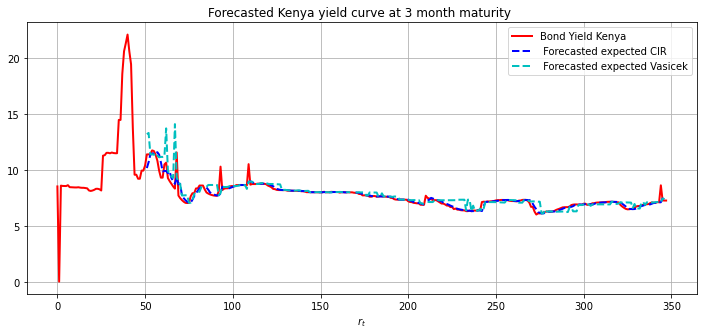

In [ ]:
### plot forecasted estimation CIR
fig= plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
ax.plot(t,r3,'red',linewidth=2, label='Bond Yield Kenya')
###forecasted path with estimate parameter##
ax.plot(t1,fc,'b--',linewidth=2,label=' Forecasted expected CIR')
ax.plot(t1,frv,'c--',linewidth=2,label=' Forecasted expected Vasicek')
# ax.plot(t,np.mean(r_c,axis=0),'g--',label='mean path')
ax.set_xlabel(r'$t$')
ax.set_xlabel(r'$r_t$')
ax.legend();
plt.grid();
plt.savefig('Forecasted.png')
plt.title('Forecasted Kenya yield curve at 3 month maturity ')

In [ ]:
##### prediciting for all maturities:
# DYB['3Month'][1]=np.mean(DYB['3Month'])
## DYB is the KEnyan Bond Yield curve data for all maturities
## creating a new dataframe for frecasted Vasicek and CIR model
columnmaturity=DYB.columns
dforecasted_v={}
for i in columnmaturity:
    frcstv=forecasted_v(DYB[i])
    dforecasted_v[i]=np.array(frcstv).flatten()
dforecasted_v=pd.DataFrame(dforecasted_v)
dforecasted_c={}
for i in columnmaturity:
    frcstc=forecasted_c(DYB[i])
    dforecasted_c[i]=np.array(frcstc).flatten()
dforecasted_c=pd.DataFrame(dforecasted_c)

In [ ]:
dforecasted_c

,3Month,6Month,1Year,2Year,10Year,25Year
0,10.176000,12.026500,12.614500,NaN,NaN,NaN
1,10.701460,12.515495,13.148851,NaN,NaN,NaN
2,11.398000,13.164000,13.803000,14.496333,14.227667,NaN
3,11.416000,13.440000,14.069000,14.892013,14.648500,14.625000
4,11.579885,13.747355,14.513164,14.385426,15.911000,14.500000
...,...,...,...,...,...,...
291,7.094245,7.683000,8.745000,9.228356,12.696040,13.683796
292,7.092000,7.715000,8.792500,9.162259,12.627704,13.770396
293,7.114000,7.747000,8.840000,9.382613,12.675047,13.702657
294,7.445929,8.321685,9.303944,9.288854,12.634615,13.727092


In [ ]:
dforecasted_v

,3Month,6Month,1Year,2Year,10Year,25Year
0,13.206866,17.267842,12.821458,NaN,NaN,NaN
1,13.320200,15.257813,12.717785,NaN,NaN,NaN
2,11.398000,17.391213,12.992428,14.496333,14.227667,NaN
3,11.416000,19.106718,16.353997,14.496333,14.227667,14.666667
4,11.365799,19.161205,18.159474,14.289091,15.911000,14.500000
...,...,...,...,...,...,...
291,7.134630,7.804888,7.555790,9.175530,12.556788,13.759468
292,7.134330,7.811369,7.559354,9.179352,12.567626,13.770396
293,7.114000,7.747000,8.840000,9.223456,12.675047,13.758462
294,7.445929,8.321685,9.303944,9.181044,12.584541,13.622050


In [ ]:
Tf=np.array([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# tf=np.array(range(dforecasted_c.shape[0]))
tf=np.arange(52,len(DYB))
# Tf=np.array(range(dforecasted_v.shape[1]))
tf, Tf = np.meshgrid(tf,Tf)

In [ ]:
# np.arange(52,len(DYB))

In [ ]:
len(DYB)

348

<ipython-input-121-366ef1d92696>:6: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf=ax.plot_surface(tf, Tf, dforecasted_c.T, rstride=10, cstride=1, vmin=np.nanmin(dforecasted_c), vmax=np.nanmax(dforecasted_c), cmap='gist_earth')


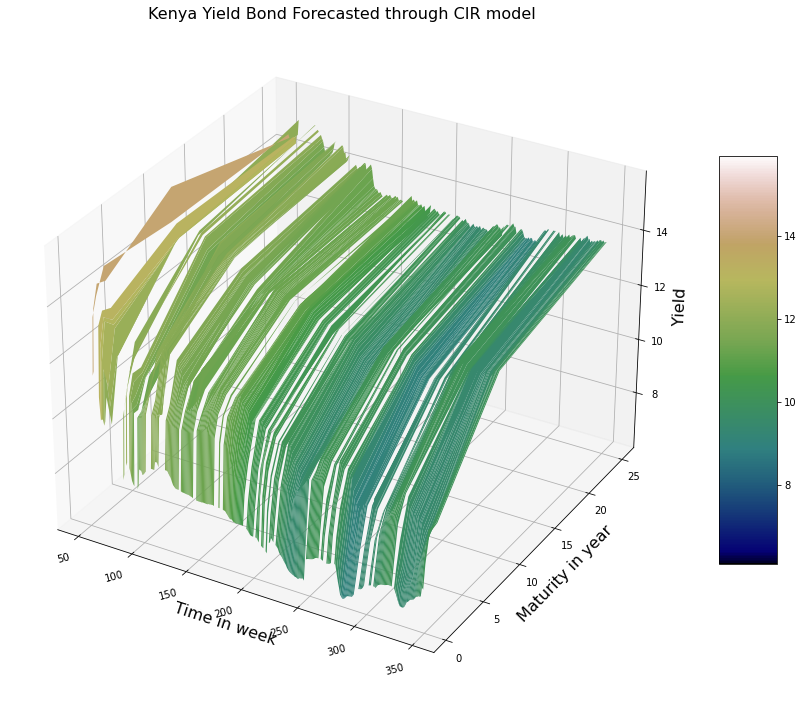

In [ ]:
# dforecasted_c.tail(50)
# from matplotlib import cm
import tikzplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(tf, Tf, dforecasted_c.T, rstride=10, cstride=1, vmin=np.nanmin(dforecasted_c), vmax=np.nanmax(dforecasted_c), cmap='gist_earth')
# ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021')
ax.set_ylabel('Maturity in year',fontsize=16)
ax.set_zlabel('Yield',fontsize=16)
ax.set_xlabel('Time in week',fontsize=16)
# ax.set_yticks([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# SO question
# def format_date(x, pos=None):
#      return dates.num2date(x).strftime('%Y-%m-%d')

# ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.yaxis.set_tick_params(labelsize=10)
fig.colorbar(surf, shrink=0.5, aspect=7)
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(15)
# plt.colorbar(surf,aspect=7)
plt.title('Kenya Yield Bond Forecasted through CIR model',fontsize=16)
plt.savefig("KenyafrcstYCCIR.png")
plt.show()

<ipython-input-120-1f27c76e9afc>:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  surf=ax.plot_surface(tf, Tf, dforecasted_v.T, rstride=10, cstride=1, vmin=np.nanmin(dforecasted_v), vmax=np.nanmax(dforecasted_v), cmap='gist_earth')


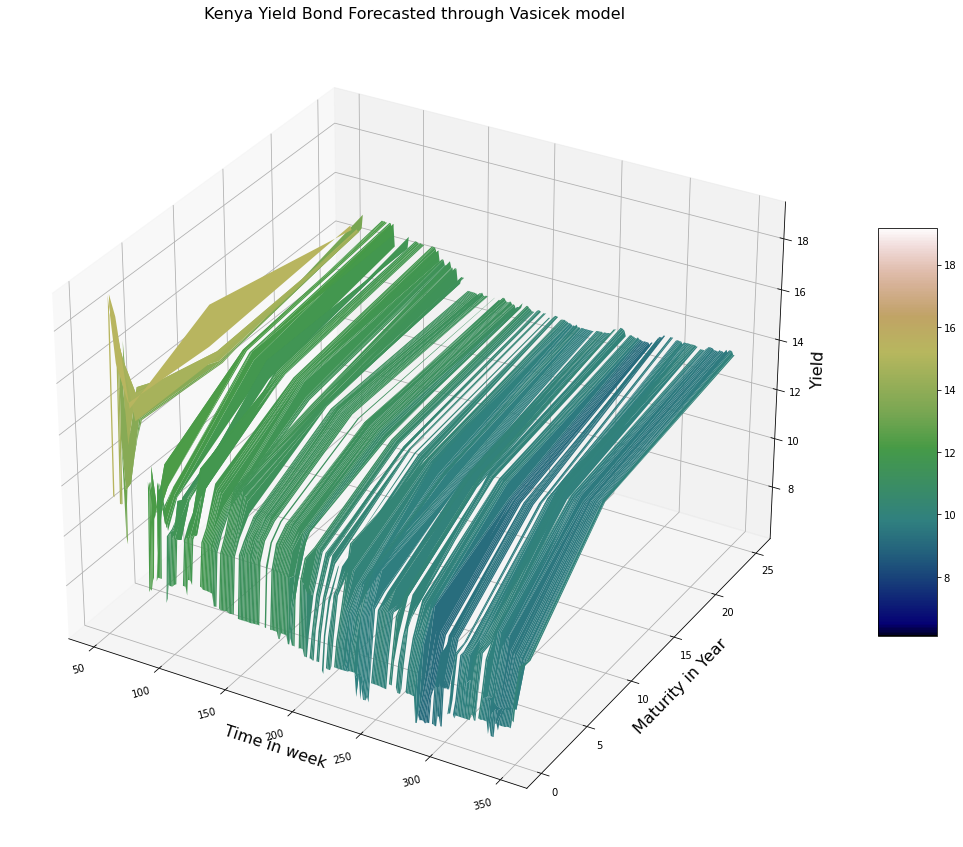

In [ ]:
import tikzplotlib
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(tf, Tf, dforecasted_v.T, rstride=10, cstride=1, vmin=np.nanmin(dforecasted_v), vmax=np.nanmax(dforecasted_v), cmap='gist_earth')
# ax.set_title('Kenya Government Yield Curve from January 2020 until December 2021')
ax.set_ylabel('Maturity in Year',fontsize=16)
ax.set_zlabel('Yield',fontsize=16)
ax.set_xlabel('Time in week',fontsize=16)
# ax.set_yticks([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# SO question
# def format_date(x, pos=None):
#      return dates.num2date(x).strftime('%Y-%m-%d')

# ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
ax.yaxis.set_tick_params(labelsize=10)
fig.colorbar(surf, shrink=0.5, aspect=7)
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(15)
plt.title('Kenya Yield Bond Forecasted through Vasicek model',fontsize=16)
plt.savefig("KenyafrcstYCVas.png")
plt.show()

In [ ]:
Y348=np.array(dforecasted_c.iloc[-1])
import numpy as np
from nelson_siegel_svensson.calibrate import calibrate_ns_ols

tf = np.array([0.25, 0.5, 1.0, 2.0,10.0,25.0])
# tf = np.linspace(0, 25, 100)
# Y39
curve_fit, status = calibrate_ns_ols(tf,Y348) #NS model calibrate
# y = np.array([0.01, 0.011, 0.013, 0.016, 0.019, 0.021, 0.026, 0.03, 0.035, 0.037, 0.038, 0.04])
assert status.success
print(curve_fit)

NelsonSiegelCurve(beta0=14.40049713138786, beta1=-6.9718848534925515, beta2=-2.9807482904507758e-05, tau=2.482447033357283)


In [ ]:
Y348o=np.array(DYB.iloc[-1])
Y348v=np.array(dforecasted_v.iloc[-1])

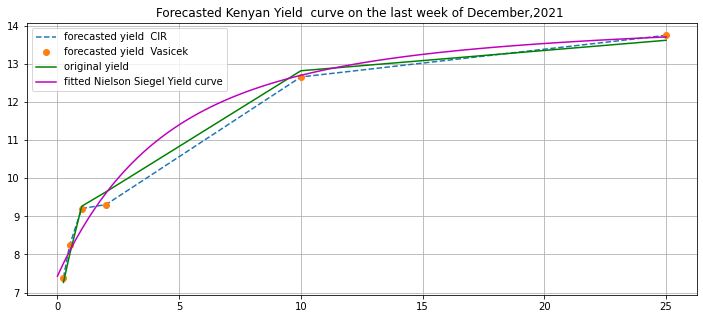

In [ ]:
tf1 = np.linspace(0, 25, 100)
plt.figure(figsize=(12,5))
plt.plot(tf,Y348,'--',label='forecasted yield  CIR')
plt.plot(tf,Y348,'o',label='forecasted yield  Vasicek')
plt.plot(tf,Y348o, 'g', label='original yield')
plt.plot(tf1, curve_fit(tf1), 'm-', label='fitted Nielson Siegel Yield curve');
plt.grid();
plt.legend();
plt.title('Forecasted Kenyan Yield  curve on the last week of December,2021 ')
plt.savefig('forecasted_yield358th_week.png')

### TEsting the predicitve performannce of the model

In [ ]:
# mean=np.mean(frv)
# frv=pd.DataFrame(frv)
# frv=frv.fillna(mean)
# frv.isna().sum()

In [ ]:
nrmse_f1v=nmrse(r3[52:],frv)
nrmse_f1c=nmrse(r3[52:],fc)

In [ ]:
# dforecasted_c=dforecasted_c.fillna(np.mean(dforecasted_c))
# dforecasted_c.isnull().sum()
# dforecasted_v=dforecasted_v.fillna(np.mean(dforecasted_v))
# dforecasted_v.isnull().sum()

In [ ]:
nrmse_f1v

0.10369483552192714

In [ ]:
errorforecast=pd.DataFrame({'Vasicek':[nrmse_f1v],'CIR':[nrmse_f1c]})
# errorforecast=errorforecast.style.set_caption('NRMSE')
# print(errorforecast.to_latex())

In [ ]:
#### error for every maturities ####
nrmse_fv=list()
nrmse_fc=list()
for i in columnmaturity:
    nrmse_fv.append(nmrse(DYB[i][52:],dforecasted_v[i]))
    nrmse_fc.append(nmrse(DYB[i][52:],dforecasted_c[i]))

In [ ]:
# DYB['3Month'][52:]
errorforecast=pd.DataFrame({'Vasicek':nrmse_fv,'CIR':nrmse_fc})
errorforecast.set_index(columnmaturity)
# errorforecast=errorforecast.style.set_caption('NRMSE')
print(errorforecast.to_latex())

\begin{tabular}{lrr}
\toprule
{} &   Vasicek &       CIR \\
\midrule
0 &  0.103695 &  0.074036 \\
1 &  0.185705 &  0.055015 \\
2 &  0.127447 &  0.079929 \\
3 &  0.100898 &  0.076214 \\
4 &  0.127508 &  0.119313 \\
5 &  0.194430 &  0.190320 \\
\bottomrule
\end{tabular}

